# Multi-linear Regression - Predicting diamond prices

# Directories, Libraries and Data

In [1]:
%cd C:/Users/shrav/Data_Analysis_Projects/Datasets/Multilinear Regression

C:\Users\shrav\Data_Analysis_Projects\Datasets\Multilinear Regression


In [2]:
# Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import seaborn as sns

In [3]:
# Data 
df = pd.read_csv('diamond.csv').iloc[:, 1:]
df.head()

,carat,colour,clarity,certification,price
0,0.30,D,VS2,GIA,1302
1,0.30,E,VS1,GIA,1510
2,0.30,G,VVS1,GIA,1510
3,0.30,G,VS1,GIA,1260
4,0.31,D,VS1,GIA,1641


# Data Analysis

## Check for outliers 

In [4]:
desc = df.describe().round(2)
desc

,carat,price
count,308.00,308.00
mean,0.63,5019.48
std,0.28,3403.12
min,0.18,638.00
25%,0.35,1625.00
50%,0.62,4215.00
75%,0.85,7446.00
max,1.10,16008.00


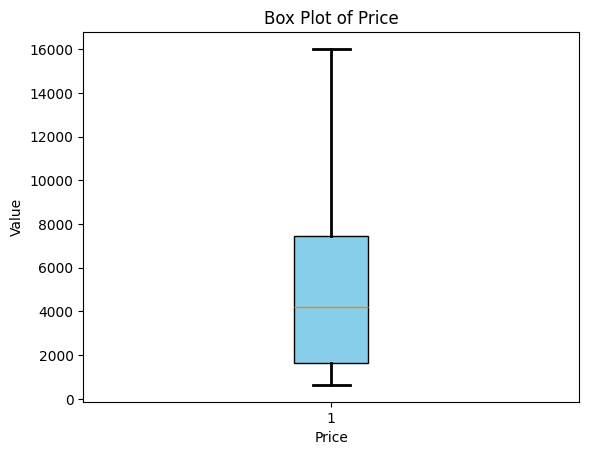

In [5]:
plt.boxplot(df['price'].dropna(), patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2))

plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.ylabel('Value')
plt.show()

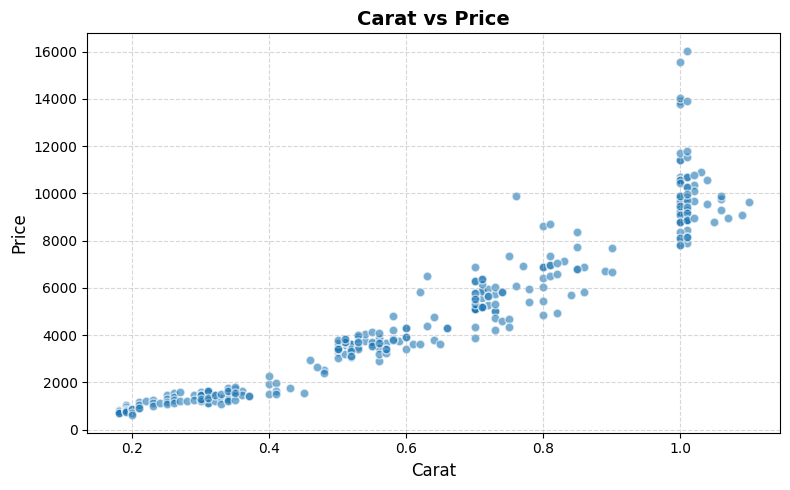

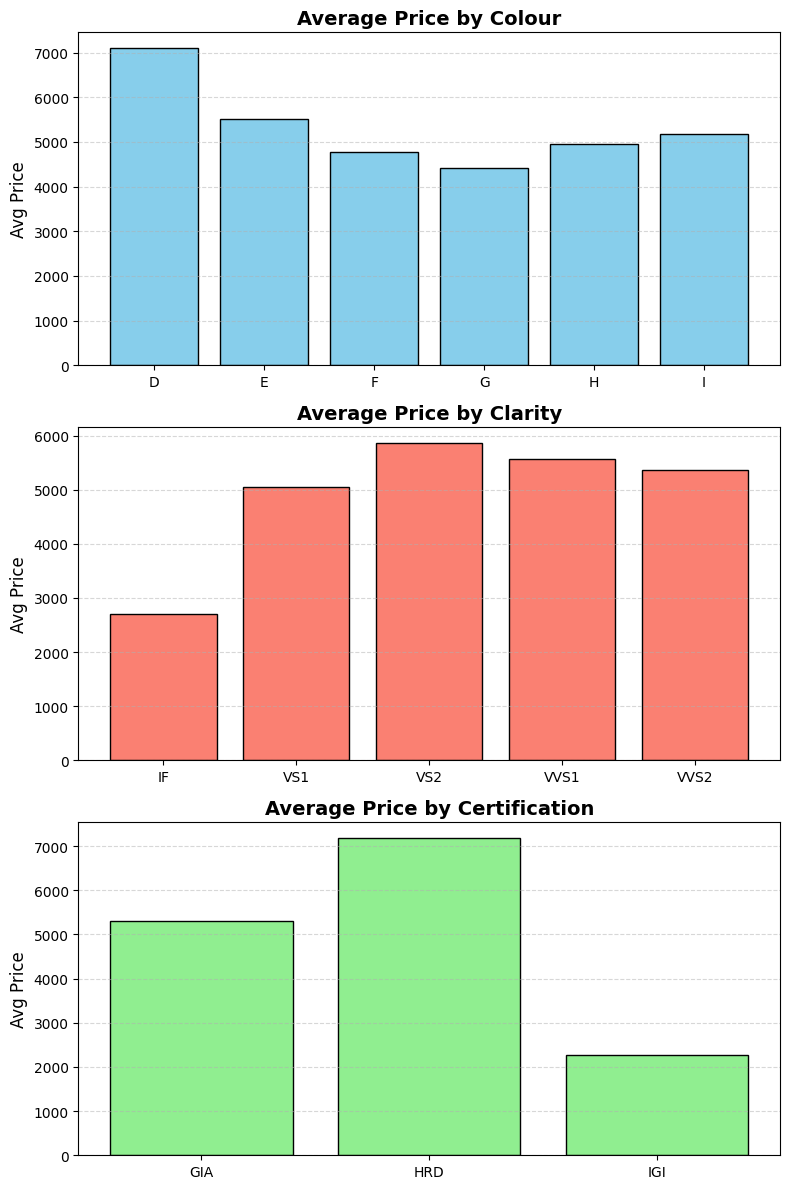

In [6]:
# --- Scatter Plot: Carat vs Price ---
plt.figure(figsize=(8, 5))
plt.scatter(df['carat'], df['price'], alpha=0.6, edgecolors='w', s=40)

plt.title('Carat vs Price', fontsize=14, weight='bold')
plt.xlabel('Carat', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Grouping for Bar Charts ---
# Group by each categorical feature and compute average price
colour_avg_price = df.groupby('colour', as_index=False)['price'].mean()
clarity_avg_price = df.groupby('clarity', as_index=False)['price'].mean()
cert_avg_price = df.groupby('certification', as_index=False)['price'].mean()

# --- Bar Charts: One Below Another ---
fig, axes = plt.subplots(3, 1, figsize=(8, 12), sharex=False)

# Plot Average Price by Colour
axes[0].bar(colour_avg_price['colour'], colour_avg_price['price'], color='skyblue', edgecolor='black')
axes[0].set_title('Average Price by Colour', fontsize=14, weight='bold')
axes[0].set_ylabel('Avg Price', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Plot Average Price by Clarity
axes[1].bar(clarity_avg_price['clarity'], clarity_avg_price['price'], color='salmon', edgecolor='black')
axes[1].set_title('Average Price by Clarity', fontsize=14, weight='bold')
axes[1].set_ylabel('Avg Price', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Plot Average Price by Certification
axes[2].bar(cert_avg_price['certification'], cert_avg_price['price'], color='lightgreen', edgecolor='black')
axes[2].set_title('Average Price by Certification', fontsize=14, weight='bold')
axes[2].set_ylabel('Avg Price', fontsize=12)
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


## Correlation matrix

In [7]:
corr_df = df.loc[:, ['carat', 'price']]
corr_df.corr()

,carat,price
carat,1.000000,0.944727
price,0.944727,1.000000


# Data preparation

In [8]:
df = pd.get_dummies(df, drop_first=True, dtype=int)
df.head()

,carat,price,colour_E,colour_F,colour_G,colour_H,colour_I,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,certification_HRD,certification_IGI
0,0.30,1302,0,0,0,0,0,0,1,0,0,0,0
1,0.30,1510,1,0,0,0,0,1,0,0,0,0,0
2,0.30,1510,0,0,1,0,0,0,0,1,0,0,0
3,0.30,1260,0,0,1,0,0,1,0,0,0,0,0
4,0.31,1641,0,0,0,0,0,1,0,0,0,0,0


# Isolate X and y

In [9]:
X = df.drop(columns = ['price'])
y = df['price']

# add constant
X = sm.add_constant(X)

# Test and train split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

# Train the model

In [11]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     443.1
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          6.35e-153
Time:                        22:03:03   Log-Likelihood:                -1963.6
No. Observations:                 246   AIC:                             3953.
Df Residuals:                     233   BIC:                             3999.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               155.1396    282.12

# Prediction

In [12]:
y_pred = model.predict(X_test)
y_pred[:4]

63      5283.252806
247     4408.496261
293    11872.570015
124     9330.144158
dtype: float64

# Metrics 

In [13]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 504.6431803482442
MSE: 431655.6364916265
RMSE: 657.0050505830427


# Residual Plot

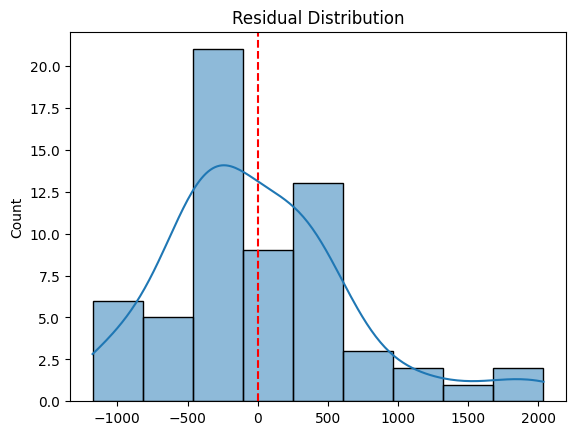

In [14]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.axvline(x=0, color='red', linestyle='--')
plt.show()